To perform sentiment analysis in Python, we can use popular libraries like NLTK (Natural Language Toolkit) and TextBlob. In this example, I'll walk you through a step-by-step process, including text preprocessing and generating a word cloud.

First, make sure you have NLTK and TextBlob installed. You can install them using pip if you haven't already:

In [1]:
!pip install nltk textblob wordcloud matplotlib --quiet

Now, let's create a Python script that performs sentiment analysis, generates sample data, preprocesses the text, and creates a word cloud.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


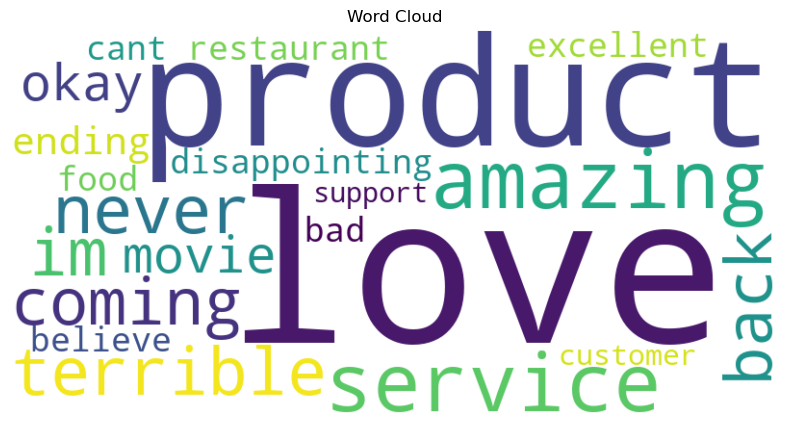

Text: I love this product! It's amazing!
Sentiment: Positive

Text: The service was terrible. I'm never coming back.
Sentiment: Negative

Text: The movie was okay, but the ending was disappointing.
Sentiment: Negative

Text: The food at the restaurant was excellent.
Sentiment: Positive

Text: I can't believe how bad the customer support is.
Sentiment: Negative



In [2]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

# Sample data (replace with your own data or load from a file)
sample_data = [
    "I love this product! It's amazing!",
    "The service was terrible. I'm never coming back.",
    "The movie was okay, but the ending was disappointing.",
    "The food at the restaurant was excellent.",
    "I can't believe how bad the customer support is.",
]

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])

    # Tokenize the text
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Perform sentiment analysis and preprocess text
sentiments = []
preprocessed_texts = []

for text in sample_data:
    # Preprocess the text
    preprocessed_text = preprocess_text(text)
    preprocessed_texts.append(preprocessed_text)

    # Perform sentiment analysis using TextBlob
    analysis = TextBlob(preprocessed_text)
    sentiment_score = analysis.sentiment.polarity

    # Determine sentiment label
    if sentiment_score > 0:
        sentiment_label = "Positive"
    elif sentiment_score < 0:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    sentiments.append(sentiment_label)

# Create a word cloud from preprocessed text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(preprocessed_texts))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.show()

# Display sentiment analysis results
for i, text in enumerate(sample_data):
    print(f"Text: {text}")
    print(f"Sentiment: {sentiments[i]}\n")

# Note: You can replace the sample_data list with your own dataset or load data from a file.
